In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/ThoracicSurgery_orig.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
id         470 non-null int64
DGN        470 non-null object
PRE4       470 non-null float64
PRE5       470 non-null float64
PRE6       470 non-null object
PRE7       470 non-null object
PRE8       470 non-null object
PRE9       470 non-null object
PRE10      470 non-null object
PRE11      470 non-null object
PRE14      470 non-null object
PRE17      470 non-null object
PRE19      470 non-null object
PRE25      470 non-null object
PRE30      470 non-null object
PRE32      470 non-null object
AGE        470 non-null int64
Risk1Yr    470 non-null object
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB


In [4]:
df.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [5]:
# Convert T/F string columns into int columns of 1/0

df[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']] = \
(df[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']] == 'T').astype(int)

In [6]:
# Change columns with string values to just the int values of those columns

df['DGN'] = df.DGN.str[-1:].astype(int)
df['PRE6'] = df.PRE6.str[-1:].astype(int)
df['PRE14'] = df.PRE14.str[-1:].astype(int)

In [7]:
# Drop id column. Using index for id.
df = df.drop(['id'], axis=1)

df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [8]:
# Rename column names
col_names = {'DGN': 'Diagnosis', 'PRE4': 'FVC', 'PRE5': 'FEV1', 'PRE6': 'Performance', \
            'PRE7': 'Pain', 'PRE8': 'Haemoptysis', 'PRE9': 'Dyspnoea', 'PRE10': 'Cough', \
            'PRE11': 'Weakness', 'PRE14': 'Tumor_Size', 'PRE17': 'Diabetes_Mellitus', \
            'PRE19': 'MI_6mo', 'PRE25': 'PAD', 'PRE30': 'Smoking', 'PRE32': 'Asthma', \
            'AGE': 'Age', 'Risk1Yr': 'Death_1yr'}
df = df.rename(index=str, columns=col_names)

In [9]:
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


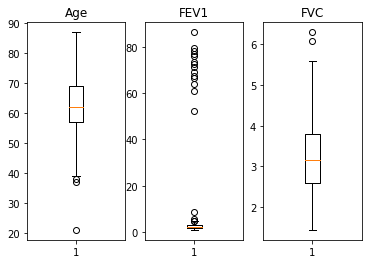

In [10]:
# Outliers?

fig, axs = plt.subplots(1,3)

axs[0].boxplot(df.Age)
axs[0].set_title('Age')

axs[1].boxplot(df.FEV1)
axs[1].set_title('FEV1')

axs[2].boxplot(df.FVC)
axs[2].set_title("FVC")
plt.show()

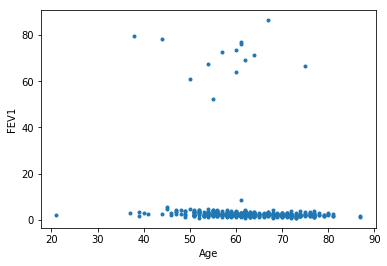

In [11]:
plt.plot(df.Age, df.FEV1, linestyle='none', marker='.')
plt.xlabel('Age')
plt.ylabel('FEV1')
plt.show()

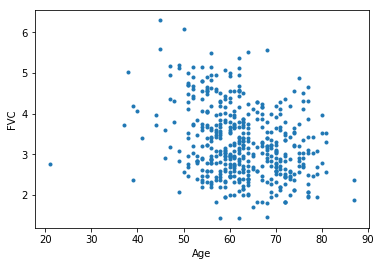

In [12]:
plt.plot(df.Age, df.FVC, linestyle='none', marker='.')
plt.xlabel('Age')
plt.ylabel('FVC')
plt.show()

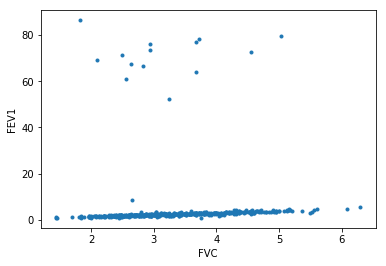

In [13]:
plt.plot(df.FVC, df.FEV1, linestyle='none', marker='.')
plt.xlabel('FVC')
plt.ylabel('FEV1')
plt.show()

In [14]:
# Outliers for Age and FEV1 columns removed. 
# 15 from high FEV1. 1 from low Age.
df = df[df.Age > 30]
df = df[df.FEV1 < 8]

In [15]:
# Original data set contained 470
len(df)

454

In [16]:
# Export dataframe to csv
df.to_csv('data/ThoracicSurgery.csv', encoding='utf-8', index=False)